<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



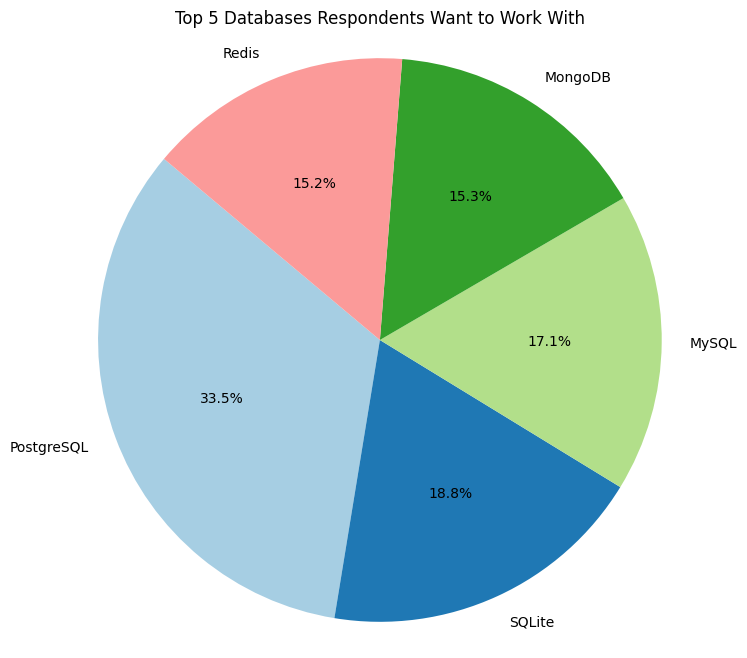

In [4]:
##Write your code here
import matplotlib.pyplot as plt
import pandas as pd

# Drop missing values
df_db = df[['DatabaseWantToWorkWith']].dropna()

# Split and expand semicolon-separated lists
df_db_expanded = df_db.assign(Database=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Count frequency
db_counts = df_db_expanded['Database'].value_counts()

# Select top 5 databases
top_5 = db_counts.head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5,
    labels=top_5.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Databases Respondents Want to Work With")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



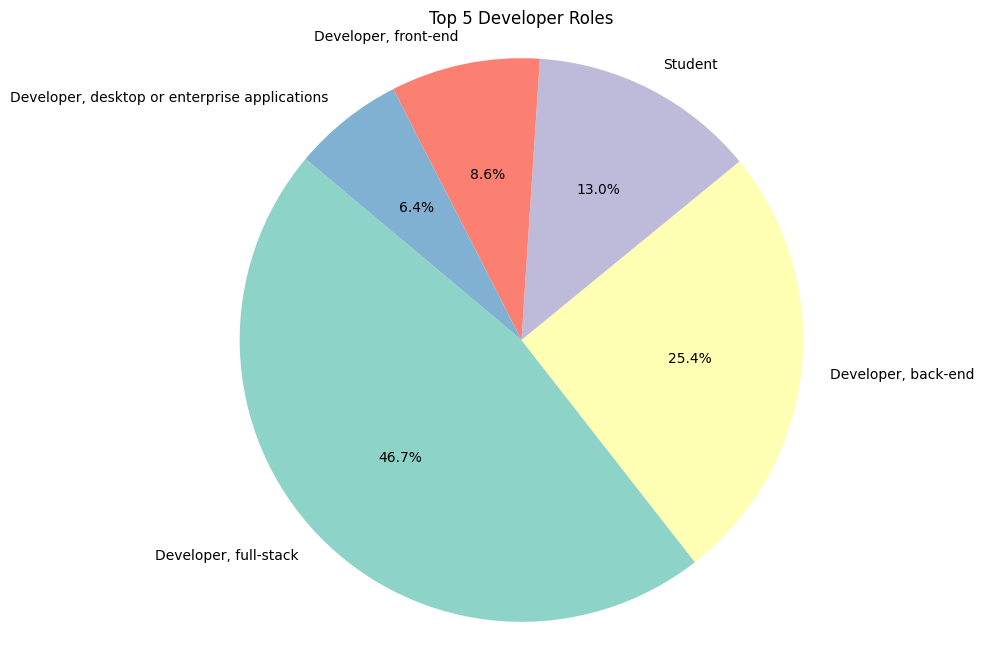

In [5]:
##Write your code here
# Drop missing values
df_dev = df[['DevType']].dropna()

# Split and expand multiple developer roles
df_dev_expanded = df_dev.assign(Role=df_dev['DevType'].str.split(';')).explode('Role')

# Count frequency of each role
role_counts = df_dev_expanded['Role'].value_counts()

# Get top 5 roles
top_5_roles = role_counts.head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_roles,
    labels=top_5_roles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Top 5 Developer Roles")
plt.axis('equal')
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [7]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

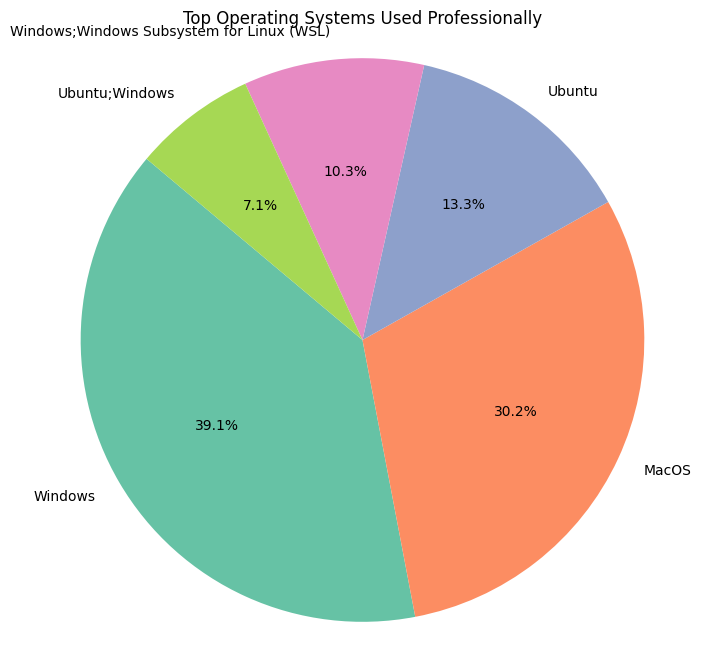

In [9]:
correct_column_name = 'OpSysProfessional use'  

df_os = df[[correct_column_name]].dropna()
os_counts = df_os[correct_column_name].value_counts()
top_os = os_counts.head(5)

plt.figure(figsize=(8, 8))
plt.pie(
    top_os,
    labels=top_os.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors
)
plt.title("Top Operating Systems Used Professionally")
plt.axis('equal')
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



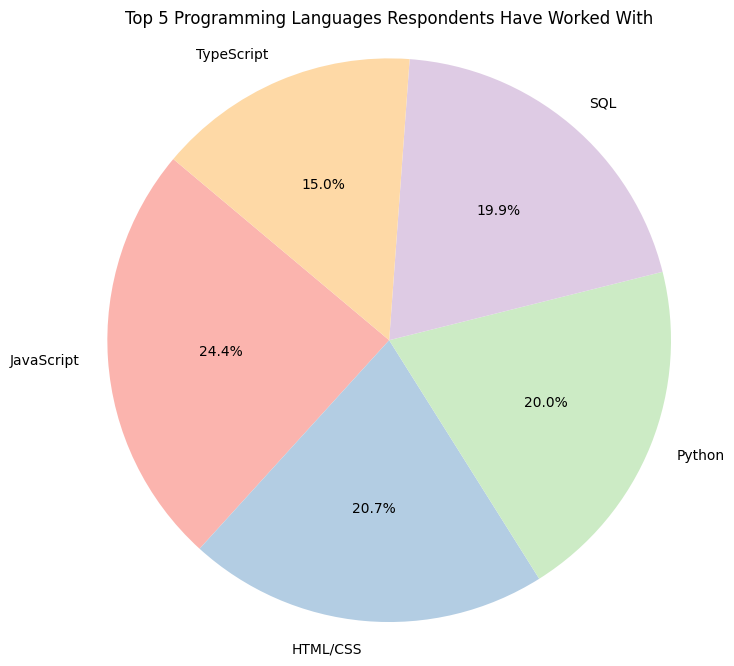

In [10]:
##Write your code here
# Drop missing values
df_lang = df[['LanguageHaveWorkedWith']].dropna()

# Split and explode semicolon-separated lists
df_lang_expanded = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Count frequency of each language
language_counts = df_lang_expanded['Language'].value_counts()

# Get top 5 languages
top_5_languages = language_counts.head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_languages,
    labels=top_5_languages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("Top 5 Programming Languages Respondents Have Worked With")
plt.axis('equal')
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



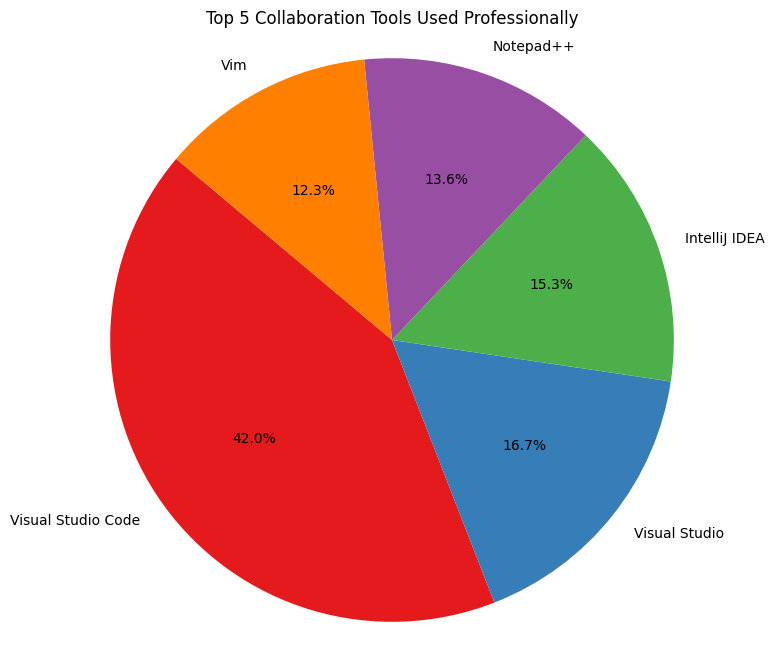

In [11]:
##Write your code here
# Drop missing values
df_tools = df[['NEWCollabToolsHaveWorkedWith']].dropna()

# Split and explode the tools column
df_tools_expanded = df_tools.assign(Tool=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Count frequency of each tool
tool_counts = df_tools_expanded['Tool'].value_counts()

# Get top 5 tools
top_5_tools = tool_counts.head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_tools,
    labels=top_5_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set1.colors
)
plt.title("Top 5 Collaboration Tools Used Professionally")
plt.axis('equal')
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



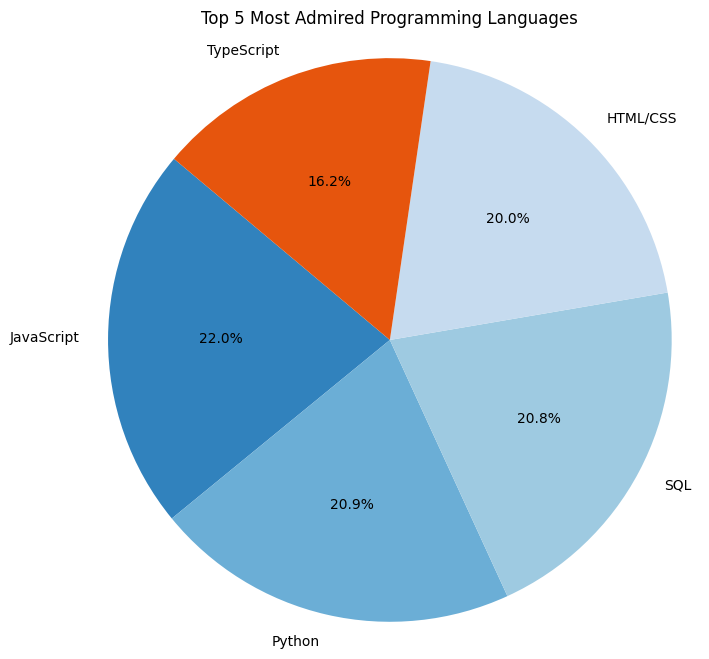

In [12]:
##Write your code here
# Drop missing values
df_admired = df[['LanguageAdmired']].dropna()

# Split and explode semicolon-separated strings
df_admired_expanded = df_admired.assign(Language=df_admired['LanguageAdmired'].str.split(';')).explode('Language')

# Count frequency of each admired language
admired_counts = df_admired_expanded['Language'].value_counts()

# Get top 5 admired languages
top_5_admired = admired_counts.head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_admired,
    labels=top_5_admired.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20c.colors
)
plt.title("Top 5 Most Admired Programming Languages")
plt.axis('equal')
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [14]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [18]:
for col in df.columns:
    print(col)

ResponseId
MainBranch
Age
Employment
RemoteWork
Check
CodingActivities
EdLevel
LearnCode
LearnCodeOnline
TechDoc
YearsCode
YearsCodePro
DevType
OrgSize
PurchaseInfluence
BuyNewTool
BuildvsBuy
TechEndorse
Country
Currency
CompTotal
LanguageHaveWorkedWith
LanguageWantToWorkWith
LanguageAdmired
DatabaseHaveWorkedWith
DatabaseWantToWorkWith
DatabaseAdmired
PlatformHaveWorkedWith
PlatformWantToWorkWith
PlatformAdmired
WebframeHaveWorkedWith
WebframeWantToWorkWith
WebframeAdmired
EmbeddedHaveWorkedWith
EmbeddedWantToWorkWith
EmbeddedAdmired
MiscTechHaveWorkedWith
MiscTechWantToWorkWith
MiscTechAdmired
ToolsTechHaveWorkedWith
ToolsTechWantToWorkWith
ToolsTechAdmired
NEWCollabToolsHaveWorkedWith
NEWCollabToolsWantToWorkWith
NEWCollabToolsAdmired
OpSysPersonal use
OpSysProfessional use
OfficeStackAsyncHaveWorkedWith
OfficeStackAsyncWantToWorkWith
OfficeStackAsyncAdmired
OfficeStackSyncHaveWorkedWith
OfficeStackSyncWantToWorkWith
OfficeStackSyncAdmired
AISearchDevHaveWorkedWith
AISearchDevWantTo

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (adjust this if needed)
# df = pd.read_csv('your_file.csv')  # Uncomment if loading from CSV

# Set this to the actual column name if it exists
ai_tool_col = 'AIToolCurrentlyUsing'

# Check if the column exists
if ai_tool_col in df.columns:
    # Drop missing values
    df_ai_tools = df[[ai_tool_col]].dropna()

    # Split and explode semicolon-separated strings into individual rows
    df_ai_tools_expanded = df_ai_tools.assign(
        Tool=df_ai_tools[ai_tool_col].str.split(';')
    ).explode('Tool')

    # Strip whitespace
    df_ai_tools_expanded['Tool'] = df_ai_tools_expanded['Tool'].str.strip()

    # Count the top 5 tools
    top_ai_tools = df_ai_tools_expanded['Tool'].value_counts().nlargest(5)

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_ai_tools.values,
        labels=top_ai_tools.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors
    )
    plt.title("Top 5 AI Tools Currently Used")
    plt.axis('equal')  # Equal aspect ratio ensures pie is circular
    plt.show()
else:
    print(f"❌ Column '{ai_tool_col}' not found in the dataset. Skipping pie chart.")

❌ Column 'AIToolCurrentlyUsing' not found in the dataset. Skipping pie chart.


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



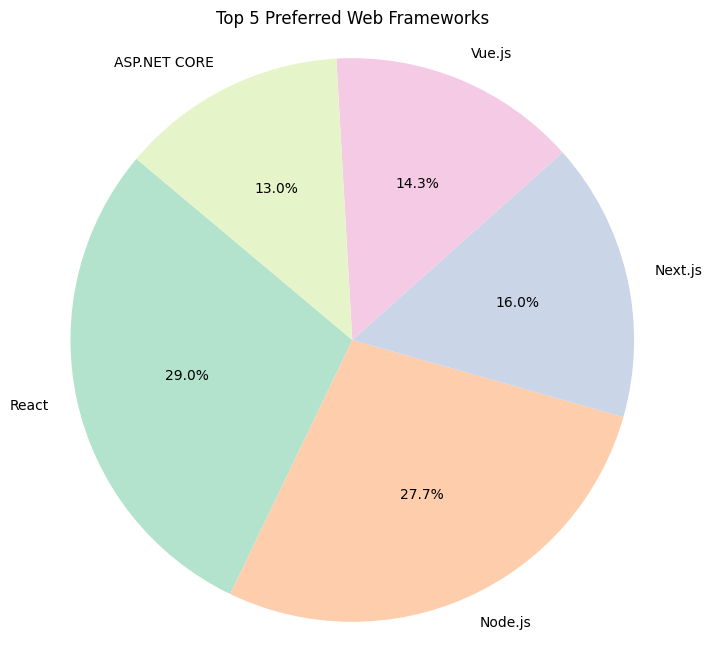

In [20]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Column name for preferred web frameworks
webframe_col = 'WebframeWantToWorkWith'

# Check if the column exists
if webframe_col in df.columns:
    # Drop missing values
    df_web = df[[webframe_col]].dropna()

    # Split the semicolon-separated strings and explode into rows
    df_web_expanded = df_web.assign(
        Framework=df_web[webframe_col].str.split(';')
    ).explode('Framework')

    # Remove leading/trailing spaces
    df_web_expanded['Framework'] = df_web_expanded['Framework'].str.strip()

    # Get the top 5 frameworks
    top_frameworks = df_web_expanded['Framework'].value_counts().nlargest(5)

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_frameworks.values,
        labels=top_frameworks.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel2.colors
    )
    plt.title('Top 5 Preferred Web Frameworks')
    plt.axis('equal')
    plt.show()
else:
    print(f"❌ Column '{webframe_col}' not found in the dataset.")

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



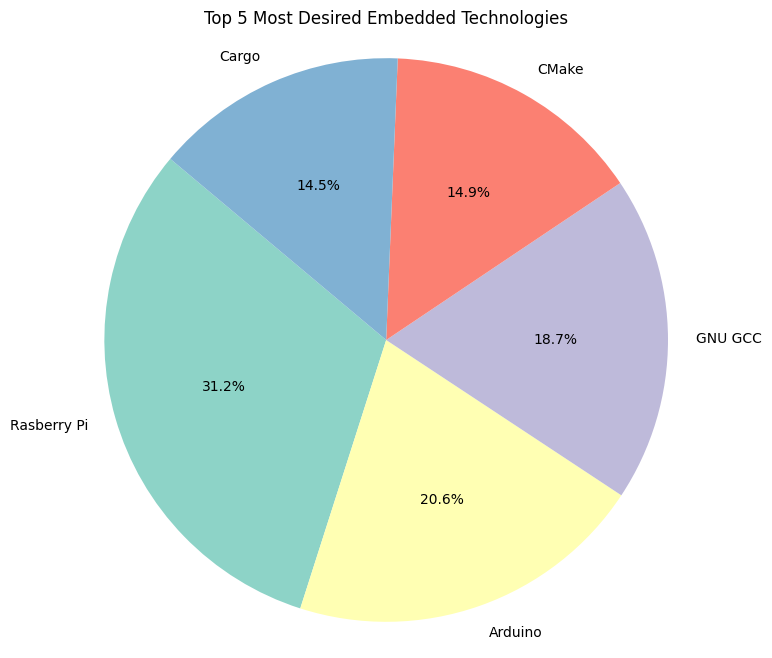

In [21]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Column name for embedded technologies
embedded_col = 'EmbeddedWantToWorkWith'

# Check if the column exists
if embedded_col in df.columns:
    # Drop missing values
    df_embedded = df[[embedded_col]].dropna()

    # Split the semicolon-separated strings and explode into rows
    df_embedded_expanded = df_embedded.assign(
        Tech=df_embedded[embedded_col].str.split(';')
    ).explode('Tech')

    # Clean whitespace
    df_embedded_expanded['Tech'] = df_embedded_expanded['Tech'].str.strip()

    # Get top 5 most desired embedded technologies
    top_embedded = df_embedded_expanded['Tech'].value_counts().nlargest(5)

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_embedded.values,
        labels=top_embedded.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors
    )
    plt.title('Top 5 Most Desired Embedded Technologies')
    plt.axis('equal')
    plt.show()
else:
    print(f"❌ Column '{embedded_col}' not found in the dataset.")

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
